In [63]:
# Dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [85]:
yr = 2023
fire_gdf = gpd.read_file(f'outputs/geojson/clean/ca_fire_{yr}.geojson').set_crs(4326)
fire_gdf.head(1)

,ALARM_DATE,CONT_DATE,CAUSE_ID,CAUSE,GIS_ACRES,AGENCY,FIRE_NAME,geometry
0,2023-06-17,2023-06-17,5,Debris,5.729125,CDF,WHITWORTH,"POLYGON ((-122.91148 41.53201, -122.91150 41.5..."


In [86]:
df = pd.read_csv(f'outputs/prcp/{yr}/CA_{yr}_coords.csv')
stn_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326)
stn_gdf.head(1)

,station,lat,lon,elev,name,geometry
0,US1CAAL0001,37.8123,-122.216,113.4,CA PIEDMONT 1.0 SE,POINT (-122.21600 37.81230)


In [79]:
gdf = fire_gdf.to_crs(32610).sjoin_nearest(stn_gdf.to_crs(32610)).to_crs(4326)
gdf.head(1)

,ALARM_DATE,CONT_DATE,CAUSE_ID,CAUSE,GIS_ACRES,AGENCY,FIRE_NAME,geometry,index_right,station,lat,lon,elev,name
0,2023-06-17,2023-06-17,5,Debris,5.729125,CDF,WHITWORTH,"POLYGON ((-122.91148 41.53201, -122.91150 41.5...",533,US1CASK0004,41.5108,-122.9234,904.0,CA ETNA 3.9 NNW


In [87]:
gdf = gdf.drop(columns=['index_right','elev','name','lat','lon']).rename(columns={'station':f'STN{yr}'})

In [88]:
gdf.head(1)

,ALARM_DATE,CONT_DATE,CAUSE_ID,CAUSE,GIS_ACRES,AGENCY,FIRE_NAME,geometry,STN2023
0,2023-06-17,2023-06-17,5,Debris,5.729125,CDF,WHITWORTH,"POLYGON ((-122.91148 41.53201, -122.91150 41.5...",US1CASK0004


In [39]:
prcp_df = pd.read_csv(f'outputs/prcp/{yr}/CA_{yr}_prcp_data.csv')

In [69]:
prcp__df = pd.read_csv(f'outputs/prcp/{yr-1}/CA_{yr-1}_prcp_data.csv')

In [47]:
gdf = gdf.merge(prcp_df)
gdf

,ALARM_DATE,CONT_DATE,CAUSE_ID,CAUSE,GIS_ACRES,AGENCY,FIRE_NAME,geometry,index_right,station,...,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31
0,2023-06-17,2023-06-17,5,Debris,5.729125,CDF,WHITWORTH,"POLYGON ((-122.91148 41.53201, -122.91150 41.5...",533,US1CASK0004,...,0.3,0.0,0.0,0.0,0.0,0.0,13.0,0.5,7.6,0.3
1,2023-06-02,2023-06-02,5,Debris,13.602380,LRA,KAISER,"POLYGON ((-121.96182 39.82970, -121.96181 39.8...",24,US1CABT0009,...,0.0,0.0,0.0,0.0,0.0,0.0,25.1,1.0,25.9,0.0
2,2023-07-01,2023-07-02,2,Equipment Use,27.814460,CDF,JACKSON,"POLYGON ((-120.90644 38.29537, -120.90397 38.2...",777,USC00041428,...,0.3,0.0,0.0,0.0,0.0,7.4,0.0,0.5,10.2,0.0
3,2023-07-11,2023-07-11,9,Miscellaneous,58.760230,CDF,CARBON,"POLYGON ((-120.98579 38.44344, -120.98488 38.4...",17,US1CAAM0013,...,0.3,0.0,0.0,0.0,0.0,0.0,4.6,0.0,10.2,0.0
4,2023-07-11,2023-07-12,14,Unknown/Unidentified,70.979000,CDF,LIBERTY,"POLYGON ((-120.98886 38.25035, -120.98895 38.2...",529,US1CASJ0017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.3,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2023-08-15,2023-11-14,14,Unknown/Unidentified,550.055900,USF,DIAMOND,"MULTIPOLYGON (((-123.95307 41.95224, -123.9530...",825,USC00043357,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5,0.0,0.0
279,2023-08-15,2023-11-14,14,Unknown/Unidentified,378.419700,USF,ISLAND,"POLYGON ((-123.71424 41.77141, -123.71443 41.7...",825,USC00043357,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5,0.0,0.0
280,2023-08-15,2023-09-15,1,Lightning,1684.730000,USF,LONE PINE,"MULTIPOLYGON (((-123.60766 41.02830, -123.6076...",145,US1CAHM0144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,2023-08-15,2023-10-25,1,Lightning,34188.450000,USF,MOSQUITO,"MULTIPOLYGON (((-123.64496 41.56489, -123.6449...",139,US1CAHM0126,...,0.3,0.5,0.0,6.1,0.5,3.8,11.2,0.5,18.8,1.3


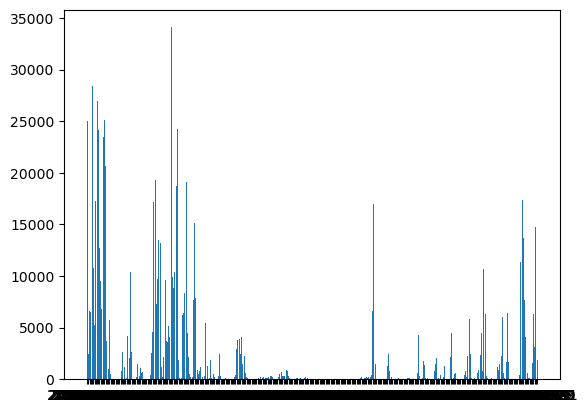

In [68]:
o_prcp_df = prcp_df.drop(columns=['station','lat','lon','elev','name'])

plt.bar(o_prcp_df.columns.to_list(),o_prcp_df.sum().to_list())
plt.show()

In [48]:
prcp_gdf = gdf.loc[:, (gdf != 0.0).any(axis=0)]

In [49]:
prcp_gdf.columns.to_list()

['ALARM_DATE',
 'CONT_DATE',
 'CAUSE_ID',
 'CAUSE',
 'GIS_ACRES',
 'AGENCY',
 'FIRE_NAME',
 'geometry',
 'index_right',
 'station',
 'lat',
 'lon',
 'elev',
 'name',
 '2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-10',
 '2023-02-11',
 '2023-02-12',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-19',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-25',
 '2023-02-26',
 '2023-02-27',
 '2023-02-28',
 '2023-03